In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
import pingouin
import warnings
warnings.simplefilter("ignore")

In [2]:
dem_data = pd.read_csv("C:/Users/Emigb/Documents/Data Science/datasets/dem_votes_potus_12_16.csv")
print(dem_data.head())

     state    county  dem_percent_12  dem_percent_16
0  Alabama   Bullock       76.305900       74.946921
1  Alabama   Chilton       19.453671       15.847352
2  Alabama      Clay       26.673672       18.674517
3  Alabama   Cullman       14.661752       10.028252
4  Alabama  Escambia       36.915731       31.020546


Visualizing the difference



Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.


In [3]:
#1. Create a new diff column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.

dem_data['diff'] = dem_data['dem_percent_12'] - dem_data['dem_percent_16']
print(dem_data.head())

     state    county  dem_percent_12  dem_percent_16      diff
0  Alabama   Bullock       76.305900       74.946921  1.358979
1  Alabama   Chilton       19.453671       15.847352  3.606319
2  Alabama      Clay       26.673672       18.674517  7.999155
3  Alabama   Cullman       14.661752       10.028252  4.633500
4  Alabama  Escambia       36.915731       31.020546  5.895185


In [4]:
#2. Calculate the mean of the diff column as xbar_diff

xbar_diff = dem_data['diff'].mean()
print(xbar_diff)

6.829312660106834


In [5]:
#3. Calculate the standard deviation of the diff column as s_diff

s_diff = dem_data['diff'].std()
print(s_diff)

#Calculating the sample size of the diff column
n_diff = len(dem_data['diff'])
print(n_diff)

5.040139140132317
500


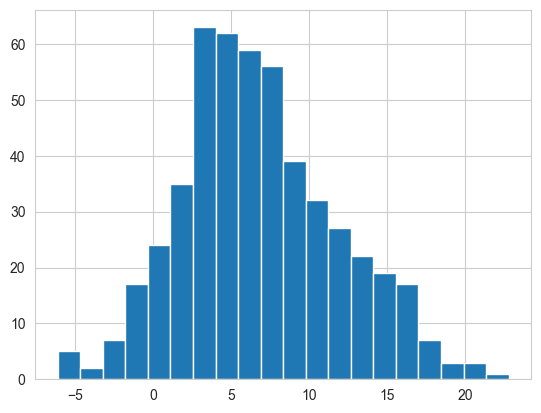

In [6]:
#4. Plot a histogram of the diff column with 20 bins.

plt.hist(dem_data['diff'], bins=20)
plt.show()

Using TTEST()




Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.





H₀: The proportion of democratic votes in 2012 and 2016 were the same.


Hₐ: The proportion of democratic votes in 2012 and 2016 were different.

In [7]:
#1. Conduct a t-test on the sample differences (the diff column of sample_dem_data), using an appropriate alternative hypothesis chosen from "two-sided", "less", and "greater".

#Calculating t_stat
t_stat = (xbar_diff - 0)/ np.sqrt(s_diff ** 2/n_diff)
print(t_stat)


p_value = pingouin.ttest(x=dem_data['diff'], y=0, alternative='two-sided')
print(p_value)

30.298384475151405
                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10 power  
T-test  2.246e+111   NaN  


In [8]:
#2. Conduct a paired test on the democratic votes in 2012 and 2016 (the dem_percent_12 and dem_percent_16 columns of sample_dem_data), using an appropriate alternative hypothesis.

p_val = pingouin.ttest(x=dem_data['dem_percent_12'], y=dem_data['dem_percent_16'], paired=True, alternative='two-sided')
print(p_val)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10 power  
T-test  2.246e+111   NaN  


TESTS FOR SINGLE PROPORTION

An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.

In [9]:
late = pd.read_csv("C:/Users/Emigb/Documents/Data Science/datasets/late_shipments.csv")
late.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [10]:
#1. Hypothesize that the proportion of late shipments is 6%.

p_o = 6/100

In [11]:
#2. Calculate the sample proportion of shipments where late equals "Yes".

p_hat = (late['late']== 'Yes').mean()
print(p_hat)


0.061


In [12]:
#3. Calculate the number of observations in the sample.

n = len(late)
print(n)

1000


In [13]:
#Calculating Stanadard Error

std_err = np.sqrt((p_o * (1-p_hat))/n)
print(std_err)


0.007505997601918082


In [14]:
#4a. Calculate the numerator z-score.

numerator = p_hat -  p_o
print(numerator)

0.0010000000000000009


In [15]:
#4b. Calculate the denominator z-score.

denominator = std_err
print(denominator)

0.007505997601918082


In [16]:
#5. Calculate the z-score as the ratio of these numbers.

z_score = numerator/denominator
print(z_score)

0.13322679449623873


In [17]:
# 6. Transform the z-score into a p-value, remembering that this is a "greater than" alternative hypothesis.

p_value = 1-norm.cdf(z_score)
print(p_value)

0.4470070103932179


proportion of late shipments for that group, are

H₀: late (expensive) - late(reasonable) = 0
Hₐ: late (expensive) - late(reasonable) > 0

Test of two proportions

You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

proportion of late shipments for that group, are

H₀: late (expensive) - late(reasonable) = 0



Hₐ: late (expensive) - late(reasonable) > 0


In [18]:
p_hats = late.groupby('freight_cost_groups')['late'].value_counts(normalize = True)
print(p_hats)


freight_cost_groups  late
expensive            No      0.920904
                     Yes     0.079096
reasonable           No      0.964835
                     Yes     0.035165
Name: proportion, dtype: float64


In [19]:
n = late.groupby('freight_cost_groups')['late'].count()
print(n)

freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64


In [20]:
#TO BE CONTINUED

CHI SQUARED TEST OF INDEPENDENCE


The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.



The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

EXW: "Ex works". The buyer pays for transportation of the goods.


CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.


DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.


FCA: "Free carrier". The seller pays for transportation of the goods.


Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.


H₀: vendor_inco_term and freight_cost_group are independent.


Hₐ: vendor_inco_term and freight_cost_group are associated.

In [21]:
#1. Calculate the proportion of freight_cost_group in late_shipments grouped by vendor_inco_term.

freight_prop = late.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize = True)
print(freight_prop)

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
DDU               reasonable             1.000000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: proportion, dtype: float64


In [22]:
#2. Unstack the .value_counts() result to be in wide format instead of long.

freight_prop_wide = freight_prop.unstack()
print(freight_prop_wide)

freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
DDU                        NaN    1.000000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


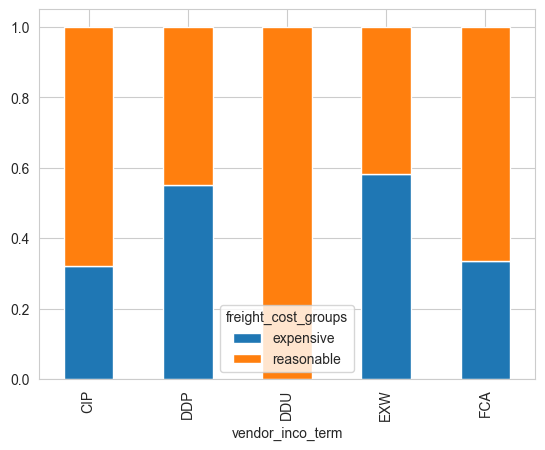

In [24]:
#3. Create a proportional stacked bar plot with bars filled based on freight_cost_group across the levels of vendor_inco_term

freight_prop_wide.plot(kind='bar', stacked=True)
plt.show()




In [25]:
#4. Perform a chi-square test of independence on freight_cost_group and vendor_inco_term in the late_shipments dataset

expected, observed, stats = pingouin.chi2_independence(data=late, x='vendor_inco_term', y='freight_cost_groups')
print(stats[stats['test']=='pearson'])

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235
